In [1]:
import coltrims
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget
plt.rcParams['image.cmap'] = 'cividis'

In [2]:
#df = pd.read_csv(r"D:\ELCH-Programm\dataCOfull.zip")
df = pd.read_pickle(r"D:\ELCH-Programm\dataCOfull-pos.zip")

In [3]:
specElec = coltrims.Spectrometer()
specElec.magneticField = 6.0
specElec.addRegion(57, 57.4)
specElec.addRegion(117, 0)

In [4]:
specIon = coltrims.Spectrometer()
specIon.magneticField = 6.
specIon.addRegion(None, 57.4)

In [5]:
reaction = coltrims.Reaction(electronSpectrometer=specElec, ionSpectrometer=specIon)

reaction.add_elec(df["e1x"], df["e1y"], df["e1tof"])

reaction.add_ion(df["r1x"], df["r1y"], df["r1tof"], m=12, q=1, tofMean=3340.0)
reaction.add_ion(df["r2x"], df["r2y"], df["r2tof"], m=16, q=1, tofMean=3865.0)

In [6]:
elecSettings = coltrims.CalcSettings(
    shiftX  =-2.90, shiftY  = 0.30, shiftTOF    =-0.47,
    stretchX= 1.00, stretchY= 1.00, stretchTotal= 1.04,
    rotateDeg= 130, shiftThenRotate=True,
)
reaction.setElectronSettings(elecSettings)

ionSettings = coltrims.CalcSettings(
    shiftX  =-0.96, shiftY  = 1.84, shiftTOF    = 1.29,
    stretchX= 1.00, stretchY= 1.00, stretchTotal= 1.29,
    rotateDeg=  60, shiftThenRotate=False,
)
reaction.setIonSettings(ionSettings)


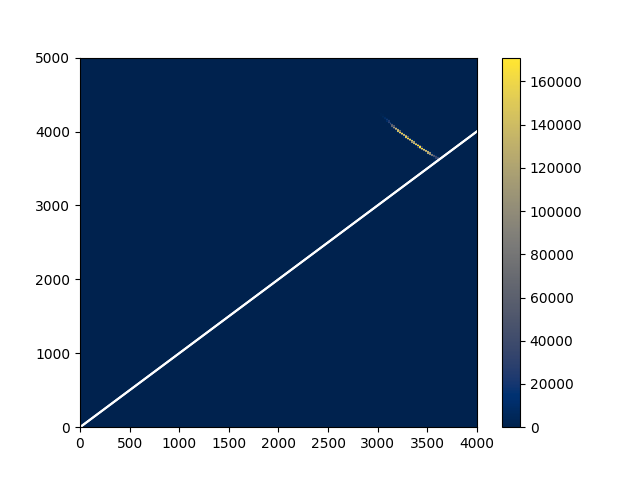

In [7]:
# Pipico
plt.close()
_,x,y,_ = plt.hist2d(reaction.i[0].tof, reaction.i[1].tof, bins=(200,300), range=((0, 4000), (0,5000)))
plt.plot(x,x,c="white")
plt.plot(y,y,c="white")
plt.colorbar()
#plt.grid("both")
plt.show()

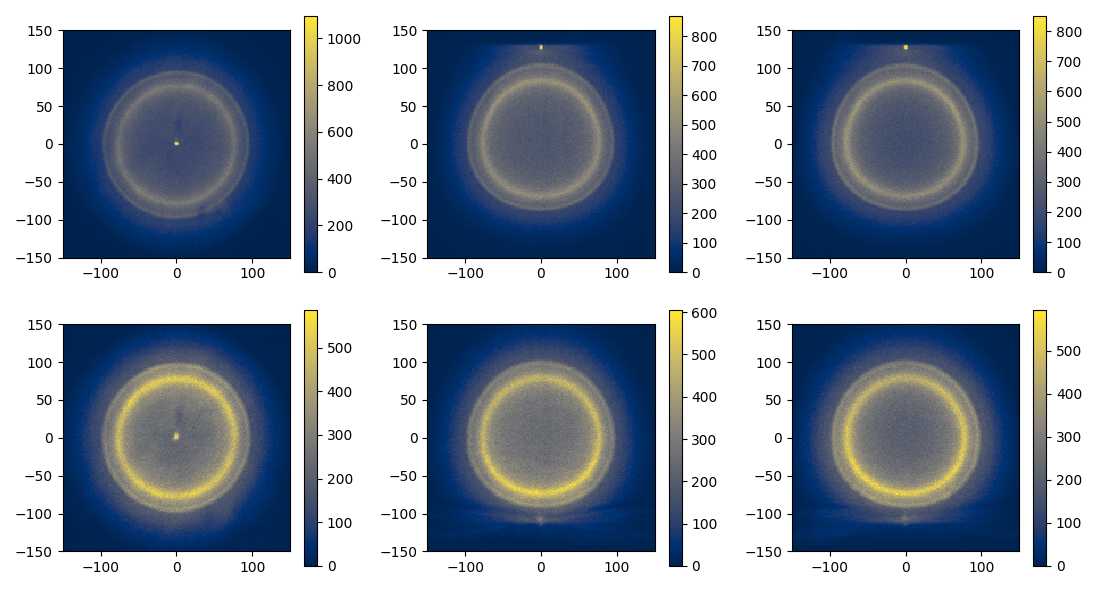

No such comm: 0876b2959f5a4370a696bd8f3ec6e780


In [8]:
# Ion Momenta
plt.close()
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(nrows=2, ncols=3, figsize=(11,6))

# Ion 0
# x-y
_,_,_,plot = ax11.hist2d(reaction.i[0].px, reaction.i[0].py, bins=(200,200), range=((-150,150), (-150,150)))
ax11.set_aspect("equal")
plt.colorbar(plot, ax=ax11)
# x-z
_,_,_,plot = ax12.hist2d(reaction.i[0].px, reaction.i[0].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax12.set_aspect("equal")
plt.colorbar(plot, ax=ax12)
# y-z
_,_,_,plot = ax13.hist2d(reaction.i[0].py, reaction.i[0].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax13.set_aspect("equal")
plt.colorbar(plot, ax=ax13)

# Ion 1
# x-y
_,_,_,plot = ax21.hist2d(reaction.i[1].px, reaction.i[1].py, bins=(200,200), range=((-150,150), (-150,150)))
ax21.set_aspect("equal")
plt.colorbar(plot, ax=ax21)
# x-z
_,_,_,plot = ax22.hist2d(reaction.i[1].px, reaction.i[1].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax22.set_aspect("equal")
plt.colorbar(plot, ax=ax22)
# y-z
_,_,_,plot = ax23.hist2d(reaction.i[1].py, reaction.i[1].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax23.set_aspect("equal")
plt.colorbar(plot, ax=ax23)

fig.tight_layout()
plt.show()

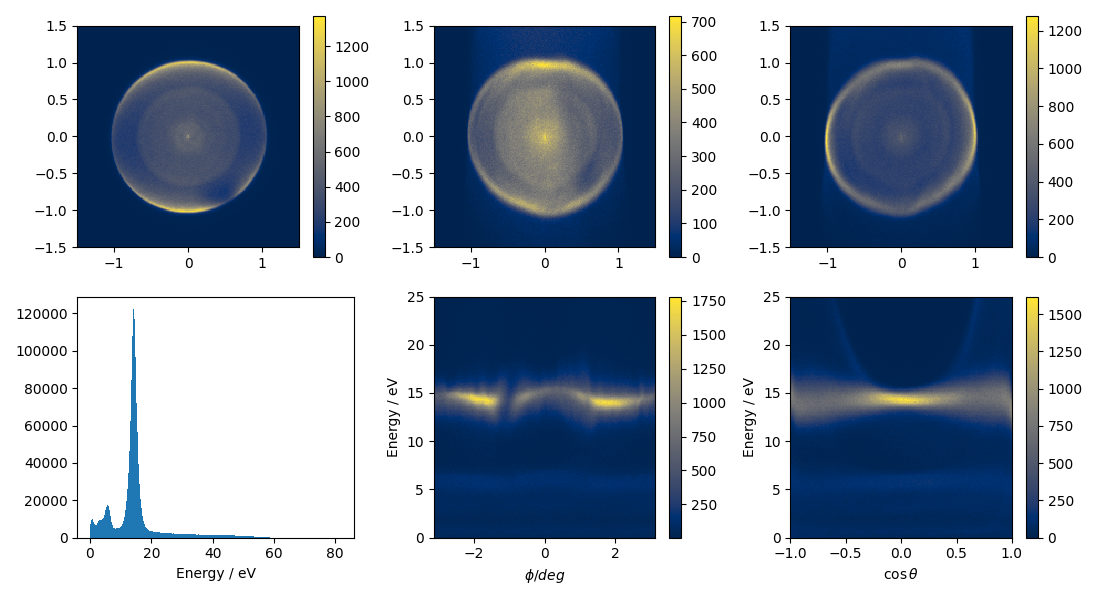

No such comm: 7e19c027bb534ec9bf48fdba549fa716


In [9]:
# Electron Momenta
plt.close()
fig, ((ax31, ax32, ax33),(ax41, ax42, ax43)) = plt.subplots(nrows=2, ncols=3, figsize=(11,6))

# Electron 0
# x-y
_,_,_,plot = ax31.hist2d(reaction.e[0].px, reaction.e[0].py, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax31.set_aspect("equal")
plt.colorbar(plot, ax=ax31)
# x-z
_,_,_,plot = ax32.hist2d(reaction.e[0].px, reaction.e[0].pz, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax32.set_aspect("equal")
plt.colorbar(plot, ax=ax32)
# y-z
_,_,_,plot = ax33.hist2d(reaction.e[0].py, reaction.e[0].pz, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax33.set_aspect("equal")
plt.colorbar(plot, ax=ax33)
# Energy
ax41.hist(reaction.e[0].energy, bins=1000)
ax41.set_xlabel("Energy / eV")
#ax41.grid("both")
# Energy-phi
#_,_,_,plot = ax42.hist2d(np.arctan2(reaction.e[0].py, reaction.e[0].py), reaction.e[0].energy, bins=(200,200), range=((-2*np.pi,2*np.pi),(0, 10)))
_,_,_,plot = ax42.hist2d(np.arctan2(reaction.e[0].py, reaction.e[0].px), reaction.e[0].energy, bins=(200,200), range=((-np.pi,np.pi),(0, 25)))
ax42.set_xlabel("$\\phi / deg$")
ax42.set_ylabel("Energy / eV")
plt.colorbar(plot, ax=ax42)
# Energy-cosTheta
_,_,_,plot = ax43.hist2d(reaction.e[0].pz/reaction.e[0].p, reaction.e[0].energy, bins=(200,200), range=((-1,1),(0,25)))
ax43.set_xlabel("$\\cos\\theta$")
ax43.set_ylabel("Energy / eV")
plt.colorbar(plot, ax=ax43)

fig.tight_layout()
plt.show()

In [10]:
momDiff    = reaction.i[0] - reaction.i[1]
angleLight = np.arccos(momDiff*[0,1,0] / (momDiff.p + 1))

In [13]:
vecLight   = np.asarray([[0,1,0]]*np.asarray(momDiff).shape[1]).T
vecZ = np.asarray(momDiff)
vecZ = vecZ / np.sqrt(vecZ[0]**2+vecZ[1]**2+vecZ[2]**2)
vecY = np.cross(vecZ, vecLight, axis=0)
vecY = vecY / np.sqrt(vecY[0]**2+vecY[1]**2+vecY[2]**2)
vecX = np.cross(vecY, vecZ, axis=0)
vecX = vecX / np.sqrt(vecX[0]**2+vecX[1]**2+vecX[2]**2)


In [14]:
vecX, vecY, vecZ

(array([[ 0.24703799, -0.18541124,  0.50158687, ...,  0.84176097,
          0.00203664,  0.01198424],
        [ 0.91858253,  0.57475852,  0.7874247 , ...,  0.53503364,
          0.93156762,  0.98791557],
        [ 0.30850991,  0.7970416 , -0.35829171, ..., -0.07195464,
         -0.3635624 ,  0.15452899]]),
 array([[-0.78058477, -0.97399381, -0.58125471, ..., -0.08517048,
         -0.99998431, -0.99700624],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.62504993, -0.22657462, -0.81372168, ..., -0.99636639,
         -0.00560181,  0.07732119]]),
 array([[ 0.57415994, -0.13022569, -0.64074455, ..., -0.53308954,
         -0.00521846,  0.07638681],
        [-0.39522922, -0.81832307,  0.61641085, ...,  0.84483075,
          0.3635681 , -0.154993  ],
        [ 0.71703154,  0.55981124,  0.45769432, ...,  0.04556907,
          0.93155301,  0.98495798]]))

In [15]:
vecX.dim

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [ ]:
a = coltrims.CoordinateSystem(momDiff, [0,1,0]*len(momDiff))